# PySpark Environment

In [2]:
# Set the pyspark environment
# Use the conda environment in this path: /Users/rmontecino/anaconda3/envs/pyspark-env
import os
os.environ['SPARK_HOME'] = '/Users/rmontecino/anaconda3/envs/pyspark-env/lib/python3.12/site-packages/pyspark'
os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'notebook'
os.environ['PYSPARK_PYTHON'] = 'python3'

In [3]:
# Import PySpark and initialize SparkSession
from pyspark.sql import SparkSession

In [4]:
# Create a SparkSession
spark = SparkSession.builder.appName('SparkSQL').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/08 09:57:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [9]:
# Install matplotlib
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 2.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.3/263.3 kB 8.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 9.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Read CSV file into DataFrame

## Read CSV with header

In [10]:
# Read CSV file into DataFrame
# Use ../data/products.csv file with header
csv_file = '../data/products.csv'
df = spark.read.csv(csv_file, header=True, inferSchema=True)

# Show the DataFrame schema
df.printSchema()

# Show the first 20 rows
df.show()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- category: string (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- price: double (nullable = true)

+---+--------------------+---------------+--------+------+
| id|                name|       category|quantity| price|
+---+--------------------+---------------+--------+------+
|  1|           iPhone 12|    Electronics|      10|899.99|
|  2|     Nike Air Max 90|       Clothing|      25|119.99|
|  3|KitchenAid Stand ...|Home Appliances|       5|299.99|
|  4|    The Great Gatsby|          Books|      50| 12.99|
|  5|L'Oreal Paris Mas...|         Beauty|     100|  9.99|
|  6|            Yoga Mat|         Sports|      30| 29.99|
|  7| Samsung 4K Smart TV|    Electronics|       8|799.99|
|  8|        Levi's Jeans|       Clothing|      15| 49.99|
|  9|Dyson Vacuum Cleaner|Home Appliances|       3|399.99|
| 10| Harry Potter Series|          Books|      20| 15.99|
| 11|        MAC Lipstick|         Bea

## Read CSV with an explicit schema definition

In [11]:
# Import the necessary types
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

# Define a new schema
schema = StructType([
    StructField('product_id', IntegerType(), False),
    StructField('product_name', StringType(), False),
    StructField('product_category_id', IntegerType(), False),
    StructField('product_description', StringType(), True),
    StructField('product_price', FloatType(), False)
])

# Load the data with the new schema
df = spark.read.csv(csv_file, header=True, schema=schema)

# Show the DataFrame schema
df.printSchema()

# Show the first 20 rows
df.show()

root
 |-- product_id: integer (nullable = true)
 |-- product_name: string (nullable = true)
 |-- product_category_id: integer (nullable = true)
 |-- product_description: string (nullable = true)
 |-- product_price: float (nullable = true)

+----------+--------------------+-------------------+-------------------+-------------+
|product_id|        product_name|product_category_id|product_description|product_price|
+----------+--------------------+-------------------+-------------------+-------------+
|         1|           iPhone 12|               null|                 10|       899.99|
|         2|     Nike Air Max 90|               null|                 25|       119.99|
|         3|KitchenAid Stand ...|               null|                  5|       299.99|
|         4|    The Great Gatsby|               null|                 50|        12.99|
|         5|L'Oreal Paris Mas...|               null|                100|         9.99|
|         6|            Yoga Mat|               null|   

24/08/08 09:59:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: id, name, category, quantity, price
 Schema: product_id, product_name, product_category_id, product_description, product_price
Expected: product_id but found: id
CSV file: file:///Users/rmontecino/Documents/clever-it/gh-adoption/gh-copilot-adoption-data-engineers/data/products.csv


# Read JSON file into DataFrame

## Single line JSON

In [12]:
# Read single line JSON
# Each row is a JSON record, records are separated by new line
json_file = '../data/products_singleline.json'
df = spark.read.json(json_file)

# Show the DataFrame schema
df.printSchema()

# Show the first 20 rows
df.show()

root
 |-- category: string (nullable = true)
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- quantity: long (nullable = true)

+---------------+---+--------------------+------+--------+
|       category| id|                name| price|quantity|
+---------------+---+--------------------+------+--------+
|    Electronics|  1|           iPhone 12|899.99|      10|
|       Clothing|  2|     Nike Air Max 90|119.99|      25|
|Home Appliances|  3|KitchenAid Stand ...|299.99|       5|
|          Books|  4|    The Great Gatsby| 12.99|      50|
|         Beauty|  5|L'Oreal Paris Mas...|  9.99|     100|
|         Sports|  6|            Yoga Mat| 29.99|      30|
|    Electronics|  7| Samsung 4K Smart TV|799.99|       8|
|       Clothing|  8|        Levi's Jeans| 49.99|      15|
|Home Appliances|  9|Dyson Vacuum Cleaner|399.99|       3|
|          Books| 10| Harry Potter Series| 15.99|      20|
|         Beauty| 11|        MAC Lipstick| 1

## Multi-lines JSON

In [13]:
# Read multi-line JSON
# Use spark json method to read multi-line JSON with multiline option
json_file = '../data/products_multiline.json'
df = spark.read.json(json_file, multiLine=True)

# Show the DataFrame schema
df.printSchema()

# Show the first 20 rows
df.show()

root
 |-- category: string (nullable = true)
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- quantity: long (nullable = true)

+---------------+---+--------------------+------+--------+
|       category| id|                name| price|quantity|
+---------------+---+--------------------+------+--------+
|    Electronics|  1|           iPhone 12|899.99|      10|
|       Clothing|  2|     Nike Air Max 90|119.99|      25|
|Home Appliances|  3|KitchenAid Stand ...|299.99|       5|
|          Books|  4|    The Great Gatsby| 12.99|      50|
|         Beauty|  5|L'Oreal Paris Mas...|  9.99|     100|
|         Sports|  6|            Yoga Mat| 29.99|      30|
|    Electronics|  7| Samsung 4K Smart TV|799.99|       8|
|       Clothing|  8|        Levi's Jeans| 49.99|      15|
|Home Appliances|  9|Dyson Vacuum Cleaner|399.99|       3|
|          Books| 10| Harry Potter Series| 15.99|      20|
|         Beauty| 11|        MAC Lipstick| 1

# DataFrame Operations

## Loading the syntethic data into DataFrame

In [14]:
# Load the synthetic data into a DataFrame
# Read with spark csv method
synthetic_file = '../data/stocks.txt'
df = spark.read.csv(synthetic_file, header=True, inferSchema=True)

# Show the DataFrame schema
df.printSchema()

# Show the first 20 rows
df.show()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- category: string (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- price: double (nullable = true)

+---+----------------+-----------+--------+-------+
| id|            name|   category|quantity|  price|
+---+----------------+-----------+--------+-------+
|  1|          iPhone|Electronics|      10| 899.99|
|  2|         Macbook|Electronics|       5|1299.99|
|  3|            iPad|Electronics|      15| 499.99|
|  4|      Samsung TV|Electronics|       8| 799.99|
|  5|           LG TV|Electronics|      10| 699.99|
|  6|      Nike Shoes|   Clothing|      30|  99.99|
|  7|    Adidas Shoes|   Clothing|      25|  89.99|
|  8| Sony Headphones|Electronics|      12| 149.99|
|  9|Beats Headphones|Electronics|      20| 199.99|
| 10|    Dining Table|  Furniture|      10| 249.99|
| 11|      Study Desk|  Furniture|       8| 149.99|
| 12|          Apples|       Food|     100|    0.5|
| 13|         Bananas|   

## Select: Choose specific columns

In [15]:
# Select specific columns from the DataFrame: name, category, and price
df.select('name', 'category', 'price').show()

+----------------+-----------+-------+
|            name|   category|  price|
+----------------+-----------+-------+
|          iPhone|Electronics| 899.99|
|         Macbook|Electronics|1299.99|
|            iPad|Electronics| 499.99|
|      Samsung TV|Electronics| 799.99|
|           LG TV|Electronics| 699.99|
|      Nike Shoes|   Clothing|  99.99|
|    Adidas Shoes|   Clothing|  89.99|
| Sony Headphones|Electronics| 149.99|
|Beats Headphones|Electronics| 199.99|
|    Dining Table|  Furniture| 249.99|
|      Study Desk|  Furniture| 149.99|
|          Apples|       Food|    0.5|
|         Bananas|       Food|   0.25|
|         Oranges|       Food|   0.75|
|  Chicken Breast|       Food|   3.99|
|   Salmon Fillet|       Food|   5.99|
|  Leather Jacket|   Clothing| 199.99|
|     Winter Coat|   Clothing| 149.99|
|        Yoga Mat|     Sports|  19.99|
|    Dumbbell Set|     Sports|  49.99|
+----------------+-----------+-------+
only showing top 20 rows



## Filter: Apply conditions to filter rows

In [16]:
# Filter rows based on a condition using filter method
df.filter(df['price'] > 100).show()

+---+----------------+-----------+--------+-------+
| id|            name|   category|quantity|  price|
+---+----------------+-----------+--------+-------+
|  1|          iPhone|Electronics|      10| 899.99|
|  2|         Macbook|Electronics|       5|1299.99|
|  3|            iPad|Electronics|      15| 499.99|
|  4|      Samsung TV|Electronics|       8| 799.99|
|  5|           LG TV|Electronics|      10| 699.99|
|  8| Sony Headphones|Electronics|      12| 149.99|
|  9|Beats Headphones|Electronics|      20| 199.99|
| 10|    Dining Table|  Furniture|      10| 249.99|
| 11|      Study Desk|  Furniture|       8| 149.99|
| 17|  Leather Jacket|   Clothing|      15| 199.99|
| 18|     Winter Coat|   Clothing|      10| 149.99|
| 21|    Coffee Table|  Furniture|       5| 129.99|
| 26|          Camera|Electronics|      10| 599.99|
| 27|         Printer|Electronics|       8| 129.99|
+---+----------------+-----------+--------+-------+



## GroupBy: Group data based on specific columns

In [17]:
# Group by category and count the number of products in each category
df.groupBy('category').count().show()

# Add aggregation like sum, avg, max, min, etc.
df.groupBy('category').agg({'price': 'avg'}).show()

+-----------+-----+
|   category|count|
+-----------+-----+
|       Food|    5|
|     Sports|    2|
|Electronics|    9|
|   Clothing|    7|
|  Furniture|    5|
|Accessories|    2|
+-----------+-----+

+-----------+------------------+
|   category|        avg(price)|
+-----------+------------------+
|       Food|2.2960000000000003|
|     Sports|             34.99|
|Electronics| 586.6566666666665|
|   Clothing|  99.2757142857143|
|  Furniture|            141.99|
|Accessories|             27.49|
+-----------+------------------+



## Join: Combine multiple DataFrames based on specified columns

In [12]:
# Join with another DataFrame. Create this new DF by filtering the original DF
df2 = df.filter(df['price'] > 100)

# Join the two DataFrames
df.join(df2, on='category', how='inner').show()


+-----------+---+-------+--------+-------+---+----------------+--------+-------+
|   category| id|   name|quantity|  price| id|            name|quantity|  price|
+-----------+---+-------+--------+-------+---+----------------+--------+-------+
|Electronics|  1| iPhone|      10| 899.99| 27|         Printer|       8| 129.99|
|Electronics|  1| iPhone|      10| 899.99| 26|          Camera|      10| 599.99|
|Electronics|  1| iPhone|      10| 899.99|  9|Beats Headphones|      20| 199.99|
|Electronics|  1| iPhone|      10| 899.99|  8| Sony Headphones|      12| 149.99|
|Electronics|  1| iPhone|      10| 899.99|  5|           LG TV|      10| 699.99|
|Electronics|  1| iPhone|      10| 899.99|  4|      Samsung TV|       8| 799.99|
|Electronics|  1| iPhone|      10| 899.99|  3|            iPad|      15| 499.99|
|Electronics|  1| iPhone|      10| 899.99|  2|         Macbook|       5|1299.99|
|Electronics|  1| iPhone|      10| 899.99|  1|          iPhone|      10| 899.99|
|Electronics|  2|Macbook|   

## WithColumn: Add new calculated columns

In [18]:
# Add a new calculated column
df.withColumn('price_after_tax', df['price'] * 1.1).show()

+---+----------------+-----------+--------+-------+------------------+
| id|            name|   category|quantity|  price|   price_after_tax|
+---+----------------+-----------+--------+-------+------------------+
|  1|          iPhone|Electronics|      10| 899.99| 989.9890000000001|
|  2|         Macbook|Electronics|       5|1299.99|          1429.989|
|  3|            iPad|Electronics|      15| 499.99|           549.989|
|  4|      Samsung TV|Electronics|       8| 799.99|           879.989|
|  5|           LG TV|Electronics|      10| 699.99|           769.989|
|  6|      Nike Shoes|   Clothing|      30|  99.99|           109.989|
|  7|    Adidas Shoes|   Clothing|      25|  89.99|            98.989|
|  8| Sony Headphones|Electronics|      12| 149.99|164.98900000000003|
|  9|Beats Headphones|Electronics|      20| 199.99|219.98900000000003|
| 10|    Dining Table|  Furniture|      10| 249.99|274.98900000000003|
| 11|      Study Desk|  Furniture|       8| 149.99|164.98900000000003|
| 12| 

## Creating a barchart

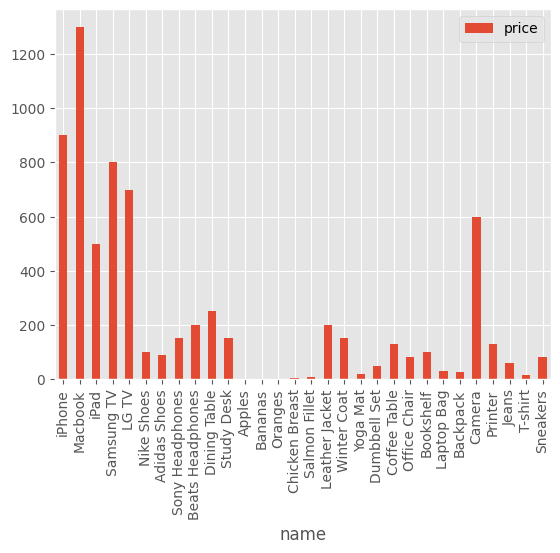

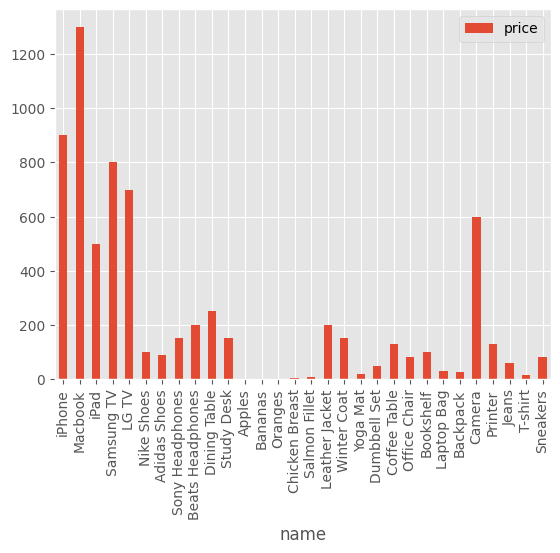

In [26]:
# Create a barchart of the product prices
# First, convert the DataFrame to Pandas DataFrame
df_pandas = df.toPandas()

# Import matplotlib
import matplotlib.pyplot as plt

# Create a bar chart
df_pandas.plot(kind='bar', x='name', y='price')
plt.show()

# Turn this into a function
def show_barchart(df):
    df_pandas = df.toPandas()
    df_pandas.plot(kind='bar', x='name', y='price')
    plt.show()

# Test the function
show_barchart(df)